In [ ]:
# Importing the liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Loading the dataset
dataset = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Checking null values
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
# Column v1 and v2 are required column because other 3 are completely empty
dataset = dataset[['v1', 'v2']]
dataset.columns = ['tag', 'message']
dataset.head(10)

,tag,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# Checking class
dataset.groupby('tag').size()

tag
ham     4825
spam     747
dtype: int64

In [ ]:
# Dimensions
dataset.shape

(5572, 2)

<Axes: >

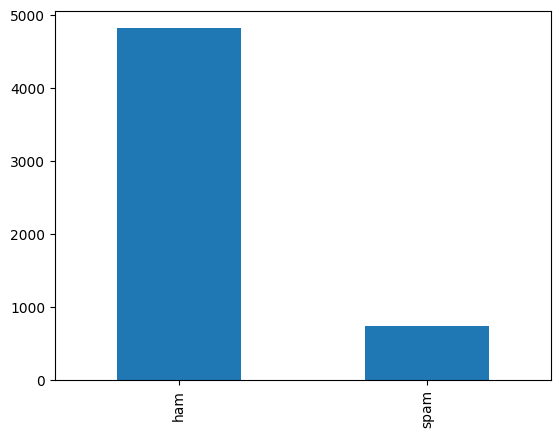

In [ ]:
# Plotting the tag
dataset['tag'].value_counts().plot(kind='bar')

NLP

In [ ]:
# Processing the text

ps = PorterStemmer()
corpus = []
for i in range(len(dataset)):
    review = re.sub('[^a-zA-Z]', " ", dataset['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing first 5 values from corpus
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [ ]:
# Creting Bag of Words

cv = CountVectorizer(max_features = 4000)
x = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(dataset['tag'])
y = y.iloc[:, 1].values

In [ ]:
# Splitting into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# Training the model

# 1. Decision Tree Classifier
model_1 = DecisionTreeClassifier()
model_1.fit(x_train, y_train)

# 2. Random Forest Classifier
model_2 = RandomForestClassifier()
model_2.fit(x_train, y_train)

# 3. Multinomial Naive Bayes
model_3 = MultinomialNB()
model_3.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Prediction 

pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)

In [ ]:
# Testing the model

# 1. Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_1))
print("Accuracy: ", accuracy_score(y_test, pred_1))
print("-----xoxo----------------------xoxo-----")


# 2. Random Forest Classifier
print()
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_2))
print("Accuracy: ", accuracy_score(y_test, pred_2))
print("-----xoxo----------------------xoxo-----")


# 3. Multinomial Naive Bayes
print()
print("Multinomial Naive Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred_3))
print("Accuracy: ", accuracy_score(y_test, pred_3))
print("-----xoxo----------------------xoxo-----")

Decision Tree Classifier
Confusion Matrix: 
[[957   8]
 [ 23 127]]
Accuracy:  0.9721973094170404
-----xoxo----------------------xoxo-----

Random Forest Classifier
Confusion Matrix: 
[[964   1]
 [ 25 125]]
Accuracy:  0.9766816143497757
-----xoxo----------------------xoxo-----

Multinomial Naive Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582
-----xoxo----------------------xoxo-----


<Axes: >

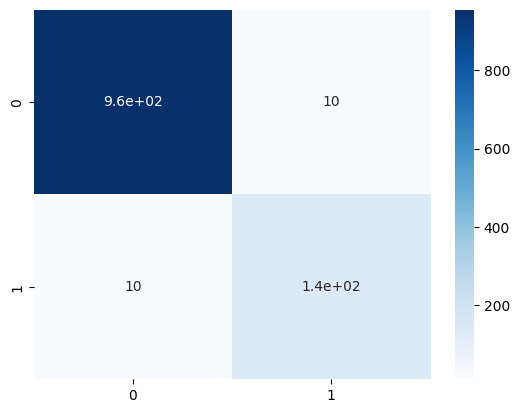

In [ ]:
cm = confusion_matrix(y_test, pred_3)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap="Blues")

In [ ]:
from sklearn.metrics import classification_report

report_1 = classification_report(y_test, pred_1)
print("Classification Report for Decision Tree Classifier \n", report_1)
print("----------xoxo----------------------xoxo----------\n")


report_2 = classification_report(y_test, pred_2)
print("Classification Report for Random Forest Classifier \n", report_2)
print("-----------xoxo----------------------xoxo---------\n")


report_3 = classification_report(y_test, pred_3)
print("Classification Report for Multinomial Navie Bayse \n", report_3)
print("-----------xoxo----------------------xoxo---------------\n")

Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.94      0.85      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

----------xoxo----------------------xoxo----------

Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

-----------xoxo----------------------xoxo---------

Classification Report for Multinomial Navie Bayse 
               precision    recall  f1-score   support

           0       0.99      

In [ ]:
# Saving all the models

filename = "Decision_Tree_Classifier.pkl"
pickle.dump(model_1, open(filename, 'wb'))
filename = "Random_Forest_Classifier.pkl"
pickle.dump(model_2, open(filename, 'wb'))
filename = "Multinomial_Navie_Bayse.pkl"
pickle.dump(model_3, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
